# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

### Analysis: 
##### Let's begin with exploring the data we are working with

In [184]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# matplotlib setup
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

np.random.seed(100)

In [168]:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [169]:
df.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [170]:
df.columns.values

array(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors',
       'volunteer', 'military', 'empholes', 'occupspecific', 'occupbroad',
       'workinschool', 'email', 'computerskills', 'specialskills',
       'firstname', 'sex', 'race', 'h', 'l', 'call', 'city', 'kind',
       'adid', 'fracblack', 'fracwhite', 'lmedhhinc', 'fracdropout',
       'fraccolp', 'linc', 'col', 'expminreq', 'schoolreq', 'eoe',
       'parent_sales', 'parent_emp', 'branch_sales', 'branch_emp', 'fed',
       'fracblack_empzip', 'fracwhite_empzip', 'lmedhhinc_empzip',
       'fracdropout_empzip', 'fraccolp_empzip', 'linc_empzip', 'manager',
       'supervisor', 'secretary', 'offsupport', 'salesrep', 'retailsales',
       'req', 'expreq', 'comreq', 'educreq', 'compreq', 'orgreq', 'manuf',
       'transcom', 'bankreal', 'trade', 'busservice', 'othservice',
       'missind', 'ownership'], dtype=object)

In [171]:
df.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Question 1:
#### What is the appropriate test for this problem?

### Answer:
##### A Z-test for two proportions is the most appropriate test for this problem because we plan to test the proportion of callback rates between the two racial groups. This test is the best fit because the samples are independent, each sample includes at least 10 successes and 10 failures, and the sampling method for each population is simple random sampling.

### Does CLT apply?
### Answer:
##### Yes, CLT applies in this situation. The sample size is sufficiently large enough to be significant (n >= 30) and the distributions appear normal. 

### Question 2:
#### What are the null and alternate hypotheses?
### Answer:
##### H<sub>0 : The rate at which white-sounding names and black-sounding names receive callbacks is equal
##### H<sub>b : The rate at which white-sounding names and black-sounding names receive callbacks is NOT equal

### Let's create initial values from the dataset

In [172]:
w = df[df['race'] == 'w'] # white sounding names
b = df[df['race'] == 'b'] # black sounding names
c = np.sum(df['call']) # called back
n = len(df)
r = c / n # rate called back

print('The total number of sample is: {}'.format(df.race.size))
print('This is the rate at which the sample was called back: {:.2%}'.format(r))

The total number of sample is: 4870
This is the rate at which the sample was called back: 8.05%


#### Let's dive in even further to learn more about the 'white-sounding names' vs 'black-sounding names'

In [173]:
w_c = np.sum(w.call) # number of callbacks for white-sounding names
w_n = len(w)
w_r = (w_c / w_n) # rate at which white-sounding names were called back
print('The total number of white-sounding names: {}'.format(w_n))
print('This is the rate at which the white-sounding names were called back: {:.2%}'.format(w_r))

print()

b_c = np.sum(b.call) # number of callbacks for black-sounding names
b_n = len(b)
b_r = (b_c / b_n) #rate at which black-sounding names were called back

print('The total number of black-sounding names: {}'.format(b_n))
print('This is the rate at which the black-sounding names were called back: {:.2%}'.format(b_r))

print()

# number of callbacks
print('The total number of call backs for black-sounding names is: {}'.format(b_c))
print('The total number of call backs for white-sounding names is: {}'.format(w_c))
print()
print('The difference in the rates of callbacks between black-sounding names and white-sounding names is: {:.2%}'.format(w_r - b_r))

The total number of white-sounding names: 2435
This is the rate at which the white-sounding names were called back: 9.65%

The total number of black-sounding names: 2435
This is the rate at which the black-sounding names were called back: 6.45%

The total number of call backs for black-sounding names is: 157.0
The total number of call backs for white-sounding names is: 235.0

The difference in the rates of callbacks between black-sounding names and white-sounding names is: 3.20%


### Now a visual representation

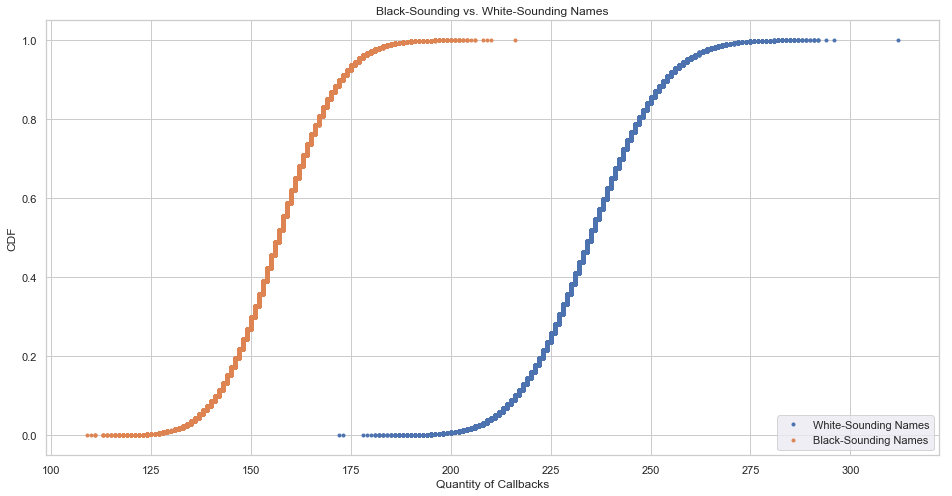

In [186]:
# Plot the CDFs of callbacks for each sample
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

w_samples = np.random.binomial(w_n, w_r, size = 100000)
b_samples = np.random.binomial(b_n, b_r, size = 100000)

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker = '.', linestyle = 'none')

bx, by = ecdf(b_samples)
_ = plt.plot(bx, by, marker = '.', linestyle = 'none')

# Time to label the plot
sns.set(rc={'figure.figsize':(12,8)})
_ = plt.xlabel('Quantity of Callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('Black-Sounding vs. White-Sounding Names')
_ = plt.legend(('White-Sounding Names', 'Black-Sounding Names'), loc = 'lower right')


### Question 3:
#### Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

#### Bootstrap Approach:

In [183]:
total_callbacks = np.array([True] * int(c) + [False] * int(n - c)) # array values converted to integers for later use

size = 10000

bs_replicates_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(total_callbacks, size = w_n))
    b_bs_replicates = np.sum(np.random.choice(total_callbacks, size = b_n))
    
    bs_replicates_diff[i] = (w_bs_replicates - b_bs_replicates) / b_n

# Compute the p-value    
bs_p_val = np.sum(bs_replicates_diff >= proportions_diff) / len(bs_replicates_diff)

# Compute 95% confidence interval
bs_conf_int = np.percentile(bs_replicates_diff, [2.5, 97.5])

bs_mean_diff = np.mean(bs_replicates_diff)

print('The observed difference is: {:.2%}'.format(proportions_diff))
print('p-value: {}'.format(bs_p_val))
print('95% Confidence interval: {}'.format(bs_conf_int))
print('White-sounding names receive a higher callback rate by approximately: {:.3%}'.format(proportions_diff / b_r))

The observed difference is: 3.20%
p-value: 0.0
95% Confidence interval: [-0.01478439  0.01478439]
White-sounding names receive a higher callback rate by approximately: 49.682%


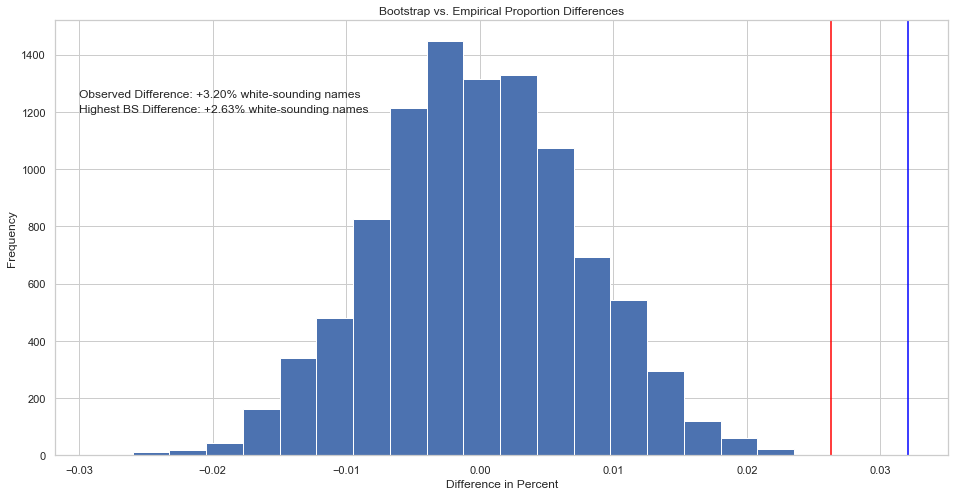

In [189]:
# Lets plot the results

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
_ = plt.hist(bs_replicates_diff, bins = 20)
_ = plt.axvline(np.max(bs_replicates_diff), color = 'red')
_ = plt.axvline(proportions_diff, color = 'blue')
_ = plt.xlabel('Difference in Percent')
_ = plt.ylabel('Frequency')
_ = plt.title('Bootstrap vs. Empirical Proportion Differences')
_ = plt.text(-.03, 1250, 'Observed Difference: +{:.2%} white-sounding names'.format(proportions_diff))
_ = plt.text(-.03, 1200, 'Highest BS Difference: +{:.2%} white-sounding names'.format(np.max(bs_replicates_diff)))

#### Frequentist Approach:

In [177]:
# First, we must define the values to be used for the Z-test of two proportions
def ztest_proportions_two_samples(w_c, n1, b_c, n2, one_sided = False):
    """This will return the z-score and p-value for a 2-sample Z-test of proportions"""
    p1 = w_c / n1
    p2 = b_c / n2
    #compute p-value
    p = (w_c + b_c) / (n1 + n2)
   
    se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
    #compute z-statistic
    z = (p1 - p2) / se
    p = 1 - stats.norm.cdf(abs(z))
    p *= 2 - one_sided
    return z, p

In [178]:
# Calculate values using 95% confidence interval
proportions_diff = w_r - b_r

z_score = 1.96 # 95% confidence z-score
p_r1 = w_r * (1 - w_r) / w_n
p_r2 = b_r * (1 - b_r) / b_n

ci_low = proportions_diff - z_score * (np.sqrt(p_r1 + p_r2))
ci_high = proportions_diff + z_score * (np.sqrt(p_r1 + p_r2))

z_val, p_val = ztest_proportions_two_samples(w_c, w_n, b_c, b_n)

moe = (ci_high - ci_low) / 2

# Print Margin of error, confidence interval values, and p-value.
print('The Margin of Error is: +/-{:.5}'.format(moe))
print('A 95% Confidence Interval: {:.5} - {:.5}'.format(ci_low, ci_high))
print('The p-value is: {:.5}'.format(p_val))
print('We observed a difference in proportions of: {:.2%}'.format(proportions_diff))
print('The z-value is: {:.5}'.format(z_val))

The Margin of Error is: +/-0.015255
A 95% Confidence Interval: 0.016777 - 0.047288
The p-value is: 3.9839e-05
We observed a difference in proportions of: 3.20%
The z-value is: 4.1084


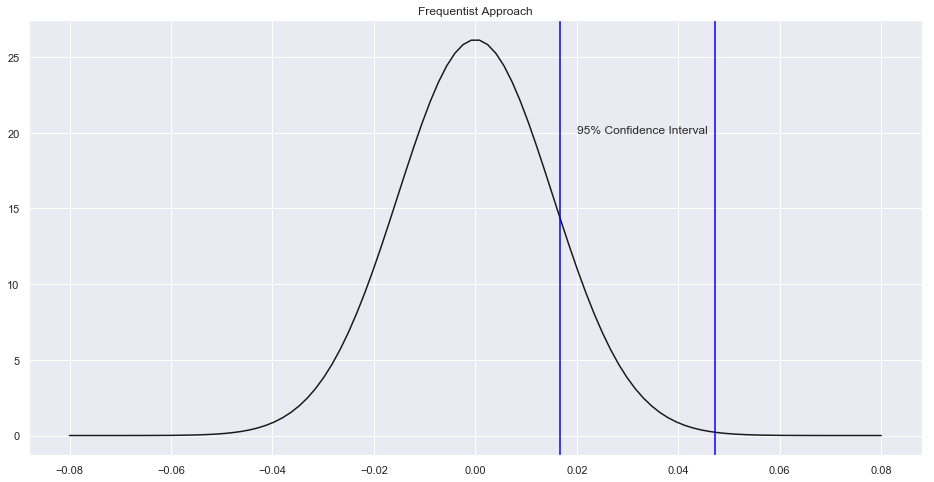

In [179]:
# Plot the Frequentist Results
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,8)})
a = np.linspace(-.08, .08, 100, endpoint = True)
pdf = [stats.norm.pdf(_, loc = 0, scale = moe) for _ in a]
plt.plot(a, pdf, 'k-')

_ = plt.axvline(ci_low, color = 'blue')
_ = plt.axvline(ci_high, color = 'blue')
_ = plt.text(.02, 20, '95% Confidence Interval')
_ = plt.title('Frequentist Approach')


### Results:
##### In both the Bootstrap and Frequentist approach, the p-value is below .05 meaning that the null hypothesis must be rejected. What this means is that rate at which white-sounding and black-sounding names are called back is not equal. 

##### With a 95% confidence interval, it can be concluded that for samples from the same population, the difference in proportions will be less than the empircal results. 

### Question 4: 
#### Write a story describing the statistical significance in the context or the original problem.

#### Answer:
##### Upon analysis, there is evidence that the proportion of callbacks for white-sounding names and black-sounding names is not equal and the white-sounding names consistently receive a higher callback rate by approximately 49.68%.

### Question 5:
#### Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

### Answer:
##### My analysis suggests that implied race through the name on a resume is a major factor in callback rate. From the original study, the researchers were certain to be sure that the resumes were the same aside from the names. 

##### A further analysis into how names were assigned "white-sounding" or "black-sounding" would be beneficial. A deeper dive into the geographic locations for where hiring managers and applicants were located could provide insight to any other factors that would impact the callback rate. 